In [5]:
import sqlite3
import requests
import seaborn as sns
#cur = conn.cursor()
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from src.make_db import create_movies_db


In [2]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [6]:
conn = sqlite3.connect('data\movies.db')
movie_title = pd.read_sql ('''SELECT genres , domestic_gross
                              FROM imdb_title_basics
                              JOIN tn_movie_budgets
                              ON primary_title=movie
                              
                              
                              ''',conn)

movie_title

,genres,domestic_gross
0,"Action,Animation,Comedy",$0
1,"Action,Adventure,Fantasy","$70,433,227"
2,None,"$1,109,808"
3,"Adventure,Drama,Romance","$720,828"
4,"Adventure,Comedy,Drama","$58,236,838"
...,...,...
3810,None,"$6,916,869"
3811,Drama,"$8,224,288"
3812,Documentary,$0
3813,Comedy,"$1,017,107"


In [7]:
movie_title['list_genres'] = movie_title['genres'].map(lambda x: str(x).split(','))

movie_title.head(2)

,genres,domestic_gross,list_genres
0,"Action,Animation,Comedy",$0,"[Action, Animation, Comedy]"
1,"Action,Adventure,Fantasy","$70,433,227","[Action, Adventure, Fantasy]"


In [8]:
list_of_genre_types = []
for i in range(len(movie_title)):
    for x in movie_title['list_genres'][i]:
        if x in list_of_genre_types:
            continue
        elif x not in list_of_genre_types:
            list_of_genre_types.append(x)

In [9]:
list_of_genre_types.sort()
list_of_genre_types

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'None',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [10]:
for genre in list_of_genre_types:
    movie_title[genre] = movie_title['list_genres'].map(lambda x: True if (genre in x) else False)

In [11]:
movie_title

,genres,domestic_gross,list_genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Mystery,News,None,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,"Action,Animation,Comedy",$0,"[Action, Animation, Comedy]",True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Action,Adventure,Fantasy","$70,433,227","[Action, Adventure, Fantasy]",True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,None,"$1,109,808",[None],False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,"Adventure,Drama,Romance","$720,828","[Adventure, Drama, Romance]",False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,"Adventure,Comedy,Drama","$58,236,838","[Adventure, Comedy, Drama]",False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,None,"$6,916,869",[None],False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3811,Drama,"$8,224,288",[Drama],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3812,Documentary,$0,[Documentary],False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3813,Comedy,"$1,017,107",[Comedy],False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
movie_title['domestic_gross'] = movie_title['domestic_gross'].str.replace('$', '').str.replace(',','')
movie_title['domestic_gross'] = movie_title['domestic_gross'].astype(int)

In [13]:
movie_title

,genres,domestic_gross,list_genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Mystery,News,None,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,"Action,Animation,Comedy",0,"[Action, Animation, Comedy]",True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Action,Adventure,Fantasy",70433227,"[Action, Adventure, Fantasy]",True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,None,1109808,[None],False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,"Adventure,Drama,Romance",720828,"[Adventure, Drama, Romance]",False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,"Adventure,Comedy,Drama",58236838,"[Adventure, Comedy, Drama]",False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,None,6916869,[None],False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3811,Drama,8224288,[Drama],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3812,Documentary,0,[Documentary],False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3813,Comedy,1017107,[Comedy],False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
gross_dict = {}

for genre in list_of_genre_types:
    gross_dict[genre] = {'average_gross': movie_title[movie_title[genre] == True]['domestic_gross'].mean(),
                           'number_movies': len(movie_title[movie_title[genre] == True])}

In [18]:
del gross_dict['Reality-TV']

C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


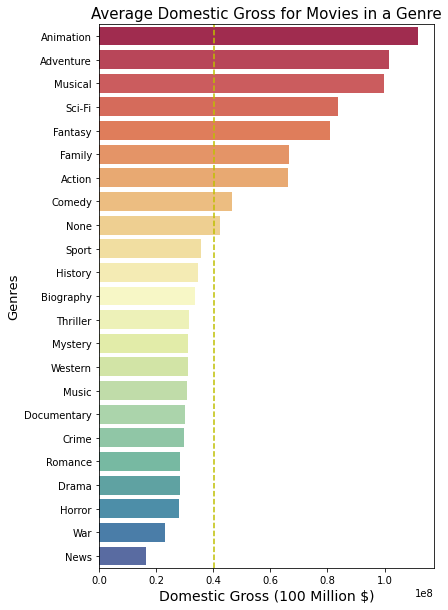

In [25]:
gross_dict_sorted = dict(sorted(gross_dict.items(), key=lambda item: item[1]['average_gross']))


# From new sorted dictionary, make sorted lists for plotting
gross_sorted = [value['average_gross'] for key, value in gross_dict_sorted.items()][::-1]
genres_sorted = [key for key, value in gross_dict_sorted.items()][::-1]

# Normalize colormap for data range
# Matplotlib normalize and ColorMap made this a very easy two liner
#norm = plt.Normalize(min(gross_sorted)-50, max(gross_sorted)+5)
# The numbers added to the min and max here are to use the central values of the colormap scale.
# When not trimmed, the low values are too light to be visible on the chart, so scale until it looks good.
#colors = plt.cm.BuPu(norm(gross_sorted))

# Define plot
fig, ax = plt.subplots(figsize=(6,10))


# Draw plot
sns.barplot(gross_sorted, genres_sorted, palette = 'Spectral', orient='horizonatal')

# Add a line to show the average rating for all movies.
avg_gross = np.mean(movie_title['domestic_gross'])
plt.axvline(x=avg_gross, ymin=0, ymax=1, color='y', linestyle='--')

# Set labels
ax.tick_params(axis='x' , labelrotation = 0)
ax.set_ylabel('Genres', fontsize=13)
ax.set_xlabel('Domestic Gross (100 Million $)', fontsize=14)
ax.set_title('Average Domestic Gross for Movies in a Genre', fontsize=15);

# the line below saves the figure to a .jpg in the images folder, uncomment to re-save




In [16]:
movie_title

,genres,domestic_gross,list_genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Mystery,News,None,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,"Action,Animation,Comedy",0,"[Action, Animation, Comedy]",True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Action,Adventure,Fantasy",70433227,"[Action, Adventure, Fantasy]",True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,None,1109808,[None],False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,"Adventure,Drama,Romance",720828,"[Adventure, Drama, Romance]",False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,"Adventure,Comedy,Drama",58236838,"[Adventure, Comedy, Drama]",False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,None,6916869,[None],False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3811,Drama,8224288,[Drama],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3812,Documentary,0,[Documentary],False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3813,Comedy,1017107,[Comedy],False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
